Import Libraries

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

Load The Features

In [8]:
data_5 = np.load(r'D:\Ali_Thesis\synthetic_data_generation\Data\Process_canada_data\P13_5_sec_features_array.npz')
X5 = data_5['arr_0']
print(f'The shape of 5 seconds features {X5.shape}')

The shape of 5 seconds features (417840, 37)


Shape of features:

- EDA: 7

- ACC: 10

- BVP: 17

- Temp: 3

Plot the Features

In [9]:
# Transposed array
X5_t = X5.T

In [14]:
X5[1,0]

np.float64(0.0005605099805335023)

In [13]:
X5_t[0,1]

np.float64(0.0005605099805335023)

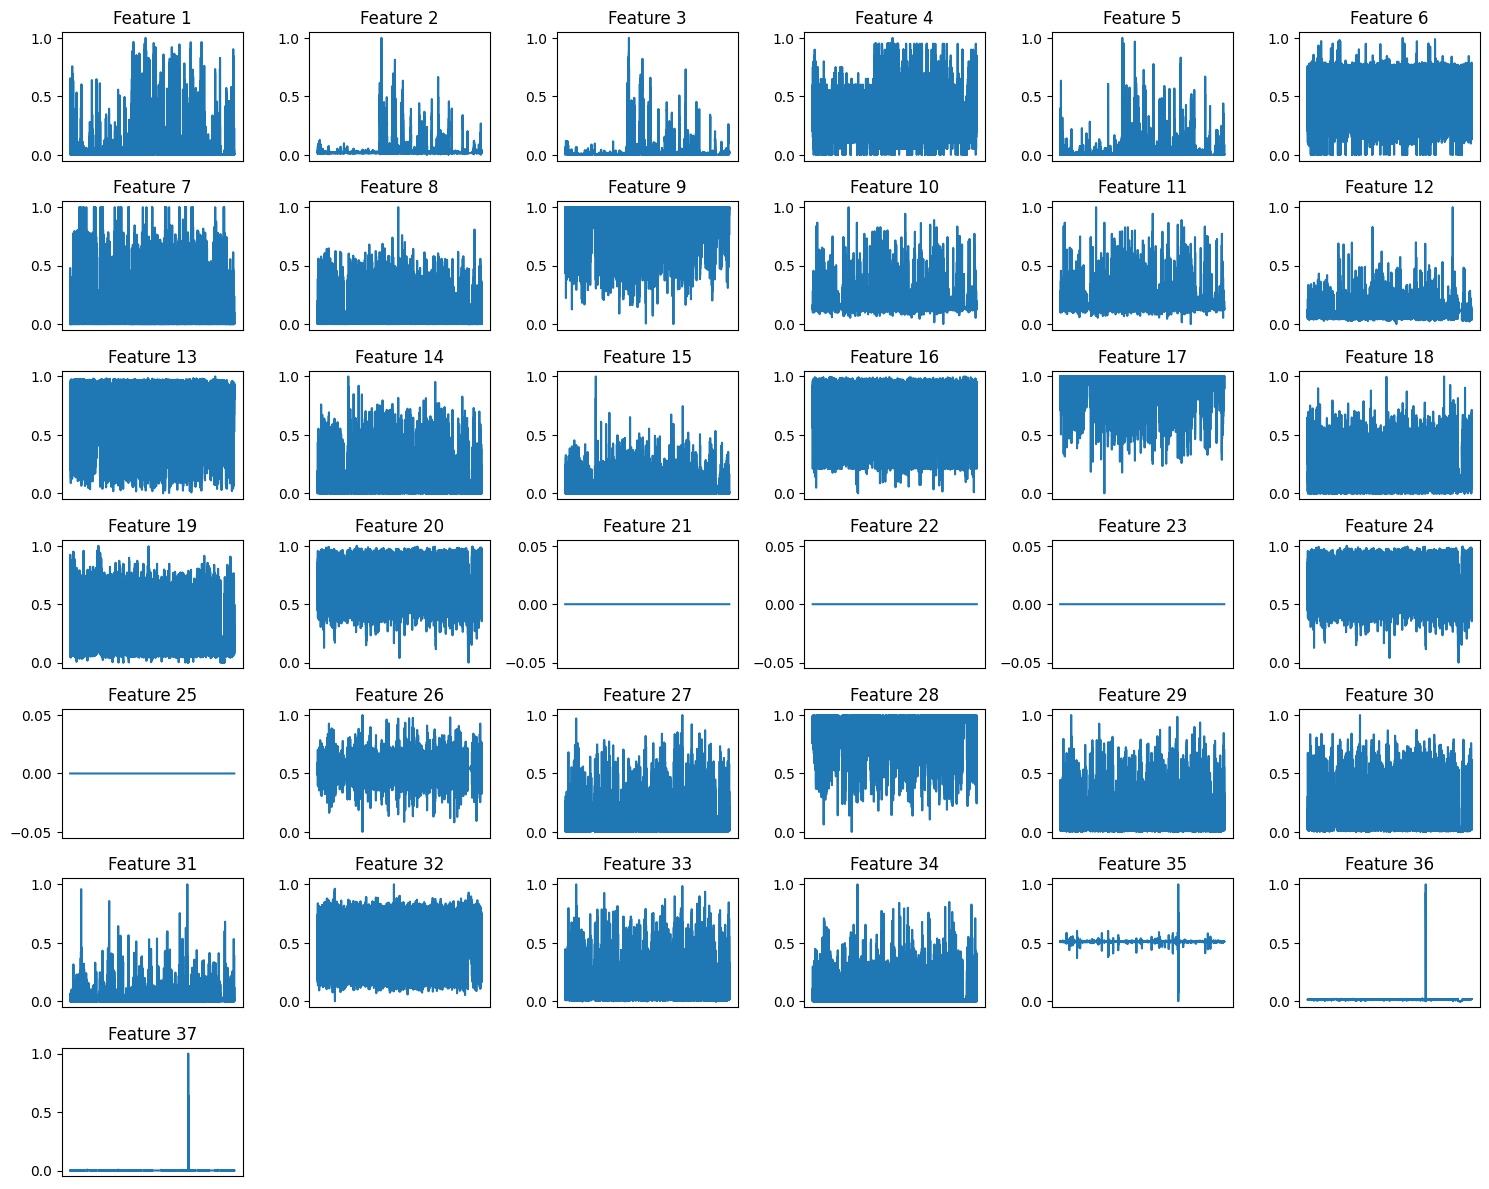

Normalized data saved
Final shape of normalized array: (37, 417840)


In [15]:
# List to store normalized features
normalized_features = []

# Create a figure with 7 rows and 6 columns
fig, axes = plt.subplots(7, 6, figsize=(15, 12))

# Plot each of the 37 columns
for i, ax in enumerate(axes.flat):
    if i < 37:
        scaler = MinMaxScaler(feature_range=(0, 1))
        X5_norm = scaler.fit_transform(X5_t[i, :].reshape(-1, 1)).flatten()

        # Append normalized feature to list
        normalized_features.append(X5_norm)

        ax.plot(X5_norm)  # Plot the i-th column of the dataset
        ax.set_title(f"Feature {i+1}")
        ax.set_xticks([])  # Optional: remove x ticks for cleaner plots
        # ax.set_yticks([])  # Optional: remove y ticks for cleaner plots
        # print(f'Feature {i+1}:')
        # print(f'--  Std = {np.std(X5_norm)}')
        # print(f'--  Var = {np.var(X5_norm)}')

    else:
        ax.axis("off")  # Turn off the empty subplots

plt.tight_layout()
plt.show()

# Stack all features into a NumPy array
X5_normalized_array = np.vstack(normalized_features)

# Save the normalized array
np.save("P13_5_sec_features_array_normalized.npy", X5_normalized_array)
print("Normalized data saved")

# Verify shape
print("Final shape of normalized array:", X5_normalized_array.shape)

Get Top 10 Features

In [17]:
# Compute standard deviation for each feature (column-wise)
std_values = np.std(X5_normalized_array, axis=1)  # axis=1 to compute std for each feature
std_values

array([0.05845351, 0.06975372, 0.07551319, 0.12545563, 0.0272712 ,
       0.17099517, 0.13451507, 0.04091149, 0.05348663, 0.021721  ,
       0.021721  , 0.02920954, 0.12860392, 0.06437789, 0.03179649,
       0.11917514, 0.03329981, 0.10267444, 0.16416397, 0.11722579,
       0.        , 0.        , 0.        , 0.11722579, 0.        ,
       0.02937263, 0.06242535, 0.07249047, 0.0850697 , 0.0997176 ,
       0.01640994, 0.15943653, 0.0850697 , 0.04476687, 0.0045399 ,
       0.0210302 , 0.00796136])

In [18]:
# Create a dictionary to map feature numbers (1 through 37) to their standard deviation values
std_dict = {i+1: std_values[i] for i in range(len(std_values))}
std_dict

{1: np.float64(0.05845350918863534),
 2: np.float64(0.06975371529110247),
 3: np.float64(0.07551319442002648),
 4: np.float64(0.12545562974860075),
 5: np.float64(0.027271200961966297),
 6: np.float64(0.17099516984271446),
 7: np.float64(0.13451507183338968),
 8: np.float64(0.040911491073618834),
 9: np.float64(0.05348662707786347),
 10: np.float64(0.021720996153470788),
 11: np.float64(0.02172099615347079),
 12: np.float64(0.029209537204581647),
 13: np.float64(0.12860391609972088),
 14: np.float64(0.06437789006499878),
 15: np.float64(0.03179649308817093),
 16: np.float64(0.11917514233638513),
 17: np.float64(0.03329981283742453),
 18: np.float64(0.10267444413818225),
 19: np.float64(0.1641639657947218),
 20: np.float64(0.117225792207715),
 21: np.float64(0.0),
 22: np.float64(0.0),
 23: np.float64(0.0),
 24: np.float64(0.117225792207715),
 25: np.float64(0.0),
 26: np.float64(0.02937262783937514),
 27: np.float64(0.062425350568508974),
 28: np.float64(0.07249047224946951),
 29: np.f

In [ ]:
# Split the dictionary into the required groups
first_7 = {k: std_dict[k] for k in list(std_dict)[:7]}   # First 7 features
next_10 = {k: std_dict[k] for k in list(std_dict)[7:17]}  # Next 10 features
next_17 = {k: std_dict[k] for k in list(std_dict)[17:34]} # Next 17 features
last_3 = {k: std_dict[k] for k in list(std_dict)[34:37]}  # Last 3 features

# Sort each group by the standard deviation in descending order
first_7_sorted = dict(sorted(first_7.items(), key=lambda item: item[1], reverse=True))
next_10_sorted = dict(sorted(next_10.items(), key=lambda item: item[1], reverse=True))
next_17_sorted = dict(sorted(next_17.items(), key=lambda item: item[1], reverse=True))
last_3_sorted = dict(sorted(last_3.items(), key=lambda item: item[1], reverse=True))

# Combine the sorted groups back into the desired order
final_sorted_dict = {**first_7_sorted, **next_10_sorted, **next_17_sorted, **last_3_sorted}

# Print the sorted dictionary (for the top features in order)
print("\nSorted Features in the Desired Order (Each Group Sorted):")
for feature, std_dev in final_sorted_dict.items():
    print(f"Feature {feature}: Std = {std_dev}")


Sorted Features in the Desired Order (Each Group Sorted):
Feature 6: Std = 0.17099516984271446
Feature 7: Std = 0.13451507183338968
Feature 4: Std = 0.12545562974860075
Feature 3: Std = 0.07551319442002648
Feature 2: Std = 0.06975371529110247
Feature 1: Std = 0.05845350918863534
Feature 5: Std = 0.027271200961966297
Feature 13: Std = 0.12860391609972088
Feature 16: Std = 0.11917514233638513
Feature 14: Std = 0.06437789006499878
Feature 9: Std = 0.05348662707786347
Feature 8: Std = 0.040911491073618834
Feature 17: Std = 0.03329981283742453
Feature 15: Std = 0.03179649308817093
Feature 12: Std = 0.029209537204581647
Feature 11: Std = 0.02172099615347079
Feature 10: Std = 0.021720996153470788
Feature 19: Std = 0.1641639657947218
Feature 32: Std = 0.15943653329447063
Feature 20: Std = 0.117225792207715
Feature 24: Std = 0.117225792207715
Feature 18: Std = 0.10267444413818225
Feature 30: Std = 0.0997175999906709
Feature 29: Std = 0.08506970299739959
Feature 33: Std = 0.08506970299739958
Fe

In [21]:
# Print the sorted groups
print("\nSorted Features in the Desired Order (Each Group Sorted):")

# Group 1: First 7 features
print("\nGroup 1: First 7 Features (Sorted by Std):")
for feature, std_dev in first_7_sorted.items():
    print(f"Feature {feature}: Std = {std_dev}")

# Group 2: Next 10 features
print("\nGroup 2: Next 10 Features (Sorted by Std):")
for feature, std_dev in next_10_sorted.items():
    print(f"Feature {feature}: Std = {std_dev}")

# Group 3: Next 17 features
print("\nGroup 3: Next 17 Features (Sorted by Std):")
for feature, std_dev in next_17_sorted.items():
    print(f"Feature {feature}: Std = {std_dev}")

# Group 4: Last 3 features
print("\nGroup 4: Last 3 Features (Sorted by Std):")
for feature, std_dev in last_3_sorted.items():
    print(f"Feature {feature}: Std = {std_dev}")


Sorted Features in the Desired Order (Each Group Sorted):

Group 1: First 7 Features (Sorted by Std):
Feature 6: Std = 0.17099516984271446
Feature 7: Std = 0.13451507183338968
Feature 4: Std = 0.12545562974860075
Feature 3: Std = 0.07551319442002648
Feature 2: Std = 0.06975371529110247
Feature 1: Std = 0.05845350918863534
Feature 5: Std = 0.027271200961966297

Group 2: Next 10 Features (Sorted by Std):
Feature 13: Std = 0.12860391609972088
Feature 16: Std = 0.11917514233638513
Feature 14: Std = 0.06437789006499878
Feature 9: Std = 0.05348662707786347
Feature 8: Std = 0.040911491073618834
Feature 17: Std = 0.03329981283742453
Feature 15: Std = 0.03179649308817093
Feature 12: Std = 0.029209537204581647
Feature 11: Std = 0.02172099615347079
Feature 10: Std = 0.021720996153470788

Group 3: Next 17 Features (Sorted by Std):
Feature 19: Std = 0.1641639657947218
Feature 32: Std = 0.15943653329447063
Feature 20: Std = 0.117225792207715
Feature 24: Std = 0.117225792207715
Feature 18: Std = 0.1

In [22]:
# Now, we will select the top features from each group:
# - From Group 1 (EDA), take 3 features
# - From Group 2 (ACC), take 3 features
# - From Group 3 (BVP), take 3 features
# - From Group 4 (TEMP), take 1 feature

top_features = {}

# Top 3 features from EDA (Group 1)
top_features.update({k: first_7_sorted[k] for k in list(first_7_sorted)[:3]})

# Top 3 features from ACC (Group 2)
top_features.update({k: next_10_sorted[k] for k in list(next_10_sorted)[:3]})

# Top 3 features from BVP (Group 3)
top_features.update({k: next_17_sorted[k] for k in list(next_17_sorted)[:3]})

# Top 1 feature from TEMP (Group 4)
top_features.update({k: last_3_sorted[k] for k in list(last_3_sorted)[:1]})

# Print the final top 10 features
print("\nTop 10 Features:")
for feature, std_dev in top_features.items():
    print(f"Feature {feature}: Std = {std_dev}")


Top 10 Features:
Feature 6: Std = 0.17099516984271446
Feature 7: Std = 0.13451507183338968
Feature 4: Std = 0.12545562974860075
Feature 13: Std = 0.12860391609972088
Feature 16: Std = 0.11917514233638513
Feature 14: Std = 0.06437789006499878
Feature 19: Std = 0.1641639657947218
Feature 32: Std = 0.15943653329447063
Feature 20: Std = 0.117225792207715
Feature 36: Std = 0.02103020032571177


Save Top 10 Features

In [27]:
# Step 6: Get the feature indices for the top 10 features
top_feature_indices = sorted(list(top_features.keys()))
top_feature_indices

[4, 6, 7, 13, 14, 16, 19, 20, 32, 36]

In [29]:
# Adjust indices to be 0-based by subtracting 1 from each index
top_10_features_0_based = [index - 1 for index in top_feature_indices]
top_10_features_0_based

[3, 5, 6, 12, 13, 15, 18, 19, 31, 35]

In [30]:
# Step 7: Select the corresponding columns from X5_normalized_array
X5_filtered = X5_normalized_array[top_10_features_0_based, :]

# Step 8: Print the shape of the filtered array
print(f"Shape of X5_filtered: {X5_filtered.shape}")

Shape of X5_filtered: (10, 417840)


In [32]:
print(X5_normalized_array[5,1000])
print(X5_filtered[1,1000])

0.5115151203156781
0.5115151203156781


In [33]:
# Get dimensions num_features
num_features, num_sequences,= X5_filtered.shape

# Compute the new number of sequences that fit in (num_sequences_new, num_features, 120)
num_sequences_new = num_sequences // 120

# Compute valid reshape shape
# valid_shape = (num_sequences_new, num_features, 120)

reshaped_features = X5_filtered.reshape(num_features, num_sequences_new, 120)
print(f'Reshaped features array shape: {reshaped_features.shape}')

# Transpose to (720, 37, 120) to match the expected format
reshaped_features = np.transpose(reshaped_features, (1, 0, 2))
print(f'Reshaped features array shape: {reshaped_features.shape}')

Reshaped features array shape: (10, 3482, 120)
Reshaped features array shape: (3482, 10, 120)


In [34]:
np.savez_compressed('P13_10_min_features_array_normalized.npz', reshaped_features)

Check

In [38]:
X5_filtered[1,:2]

array([0.6382073 , 0.69269438])

In [37]:
reshaped_features[0,1,:]

array([0.6382073 , 0.69269438, 0.69406212, 0.44735611, 0.40545764,
       0.55752539, 0.34583621, 0.32314785, 0.66065552, 0.52102236,
       0.44174494, 0.69666997, 0.64646205, 0.47226226, 0.20141999,
       0.48932137, 0.56361324, 0.44242114, 0.61590442, 0.53642738,
       0.35308997, 0.39323825, 0.54177325, 0.45026599, 0.50085261,
       0.36359322, 0.55893557, 0.55578284, 0.62612098, 0.51911163,
       0.60219548, 0.55785357, 0.53256592, 0.55225164, 0.39693673,
       0.2729442 , 0.62000754, 0.65154114, 0.60523422, 0.6906566 ,
       0.6787662 , 0.69295238, 0.59357892, 0.45278856, 0.59846729,
       0.64983484, 0.42537442, 0.27963749, 0.55626717, 0.66161876,
       0.67870059, 0.64151307, 0.63393135, 0.68577157, 0.6419185 ,
       0.71596765, 0.71383822, 0.71622601, 0.61190369, 0.69639805,
       0.58366398, 0.66155068, 0.71381597, 0.60059512, 0.60931647,
       0.66220324, 0.69665521, 0.65813079, 0.69587939, 0.68895257,
       0.66170019, 0.68070577, 0.58506044, 0.66773178, 0.74247